<a href="https://colab.research.google.com/github/nairsatish/4540/blob/master/XOR_perceptron_HW4_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XOR perceptron

In [ ]:
import numpy as np

def sigmoid(z):
    return 1/(1+np.exp(-z))

def heaviside(z):
    return float(z>0)

def relu(z):
    return np.fmax(z, 0)

class perceptron:
    def __init__(self, weigths, activation=sigmoid):
        self.weights = weigths
        self.activation = activation
        self.build_neurons()

    def neuron(self, theta):
        def func(x):
            x = np.insert(x, 0, 1.) # add bias term
            return self.activation(np.sum(x*theta))
        return func

    def build_neurons(self):
        self.neurons = []
        for wgts in self.weights:
            layer = []
            for theta in wgts:
                layer.append(self.neuron(np.array(theta)))
            self.neurons.append(layer)

    def single_forward(self, x):
        for layer in self.neurons:
            y = []
            for neuron in layer:
                y.append(neuron(x))
            x = np.array(y)
        return x

    def forward(self, x):
        y = []
        for i in range(x.shape[0]):
            y.append(self.single_forward(x[i]))
        return np.array(y)

    def predict(self, x):
        return np.round(self.forward(x)).astype(int)


In [ ]:
# domain {0, 1}
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.logical_xor(x[:,[0]], x[:,[1]]).astype(int)
print(np.hstack((x, y)))

[[0 0 0]
 [0 1 1]
 [1 0 1]
 [1 1 0]]


In [ ]:
net1 = perceptron(weigths=[[[-1,2,2], [3,-2,-2]], [[-3,2,2]]], activation=heaviside)
net2 = perceptron(weigths=[[[0,1,1], [-1,1,1]], [[0,1,-2]]], activation=relu)
net3 = perceptron(weigths=[[[-2,4,4], [6,-4,-4]], [[-6,4,4]]], activation=sigmoid)

In [ ]:
for net in (net1, net2, net3):
    print(net.predict(x).ravel())

[0 1 1 0]
[0 1 1 0]
[0 1 1 0]


In [ ]:
# domain {-1, 1}
x = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.logical_xor(x[:,[0]], x[:,[1]]).astype(int)
x = 2*x-1
print(np.hstack((x, y)))

[[-1 -1  0]
 [-1  1  1]
 [ 1 -1  1]
 [ 1  1  0]]


In [ ]:
net1 = perceptron(weigths=[[[1,1,1], [1,-1,-1]], [[-3,2,2]]], activation=heaviside)
net2 = perceptron(weigths=[[[1,.5,.5], [0,.5,.5]], [[0,1,-2]]], activation=relu)
net3 = perceptron(weigths=[[[2,2,2], [2,-2,-2]], [[-6,4,4]]], activation=sigmoid)

In [ ]:
for net in (net1, net2, net3):
    print(net.predict(x).ravel())

[0 1 1 0]
[0 1 1 0]
[0 1 1 0]


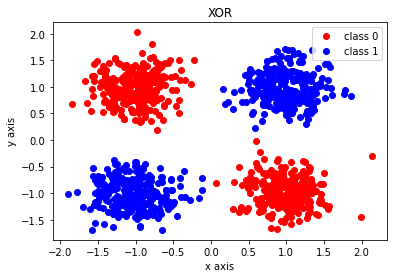

In [ ]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

rng = np.random.RandomState(0)
X = rng.randn(1000, 2)
X = (X > 0) * 2 - 1 + 0.3 * rng.randn(*X.shape)
Y = np.logical_xor(X[:,0] > 0, X[:,1] > 0).astype(int)

c0 = X[np.nonzero(Y)[0]]
c1 = X[np.nonzero(Y == 0)[0]]

plt.plot(c0[:,0], c0[:,1], 'ro', label='class 0')
plt.plot(c1[:,0], c1[:,1], 'bo', label='class 1')

plt.title('XOR') 
plt.xlabel('x axis')
plt.ylabel('y axis')
plt.legend()
plt.show()

In [ ]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func,X,Y):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx,yy=np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.title('XOR')
    plt.xlabel('x axis')
    plt.ylabel('y axis')
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    # Plot ground truth
    c0 = X[np.nonzero(Y)[0]]
    c1 = X[np.nonzero(Y == 0)[0]]
    plt.plot(c0[:,0], c0[:,1], 'ko', label='class 0')
    plt.plot(c1[:,0], c1[:,1], 'wo', label='class 1')
    plt.legend()

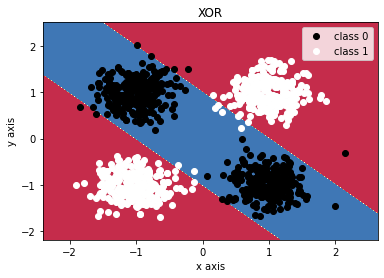

In [ ]:
plot_decision_boundary(net1.predict, X, Y)

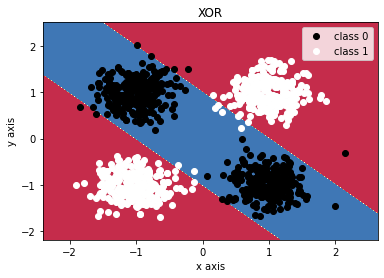

In [ ]:
plot_decision_boundary(net2.predict, X, Y)

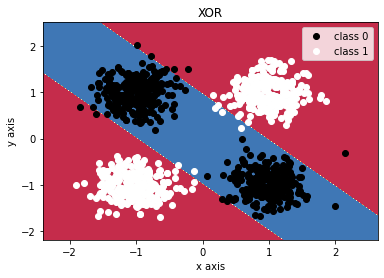

In [ ]:
plot_decision_boundary(net3.predict, X, Y)